In [1]:
from sklearn.metrics import confusion_matrix,roc_curve,auc
import seaborn as sns
from utils import Engine,AverageMeter
from data import spectralloader
import torch
import numpy as np
from model import ScaleAdaptiveNet
import matplotlib.pyplot as plt

In [2]:
device = 'cuda:0'

## Make prediction for binary mssa/mrsa task

#### load test dataset

In [3]:
loader = spectralloader('test',mssa_mrsa=True)

In [4]:
net = ScaleAdaptiveNet(num_classes=1).to(device)
net.load_state_dict(torch.load('param/2/finetune/1.pth'))

<All keys matched successfully>

#### Get the  probabilities, predictions, real labels and accuracy of the test set 

In [5]:
probs,pred,true,_,_=Engine.test(loader,torch.nn.BCEWithLogitsLoss(),net,device,binary=True)

Average test loss is 0.180943, the accuracy rate of testset is 0.9360 : 100%|██████████| 32/32 [00:00<00:00, 68.16it/s]


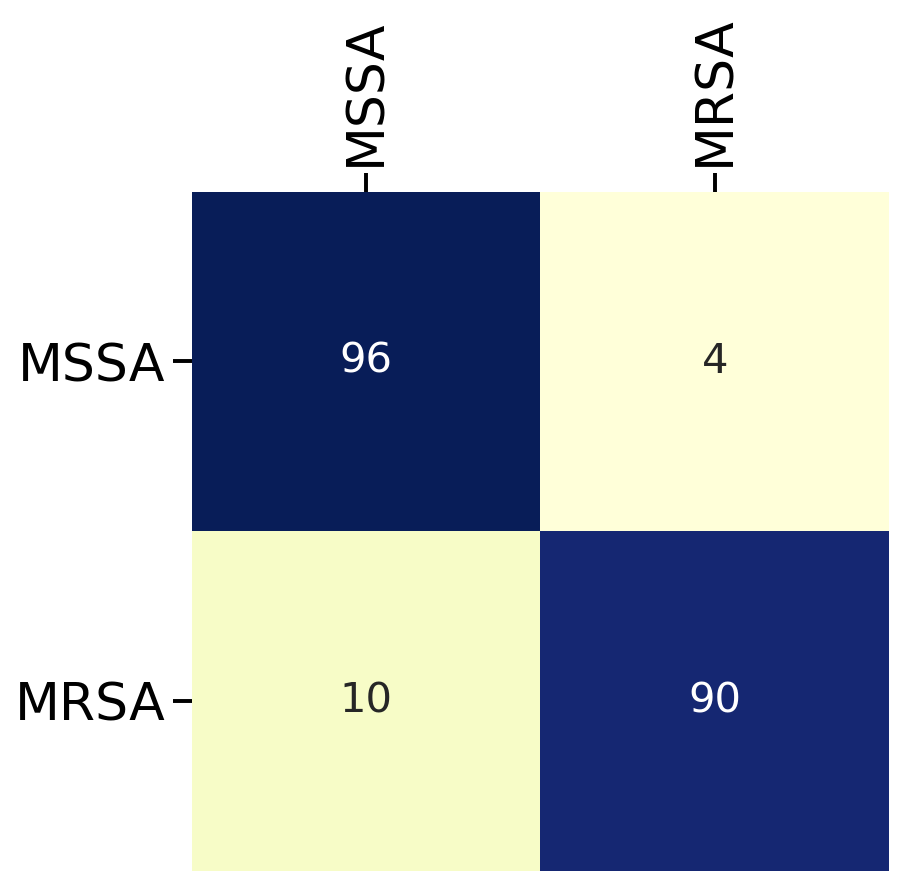

In [6]:
fig = plt.figure(figsize=(6,6),dpi=150)
sns.set_context("talk", rc={"font":"Helvetica", "font.size":20})
label = ['MSSA','MRSA']
cm = confusion_matrix(true, pred, labels=[0,1])
cm = 100 * cm / cm.sum(axis=1)[:,np.newaxis]
ax = sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt='0.0f', xticklabels=label, yticklabels=label,cbar=False)

ax.xaxis.tick_top()
ax.tick_params(labelsize=25)

ax.tick_params(labelsize=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [7]:
acc = (pred==true).mean()
print('Accuracy: {:2f}%'.format(100*acc))

Accuracy: 93.600000%


#### Get the  ROC curve

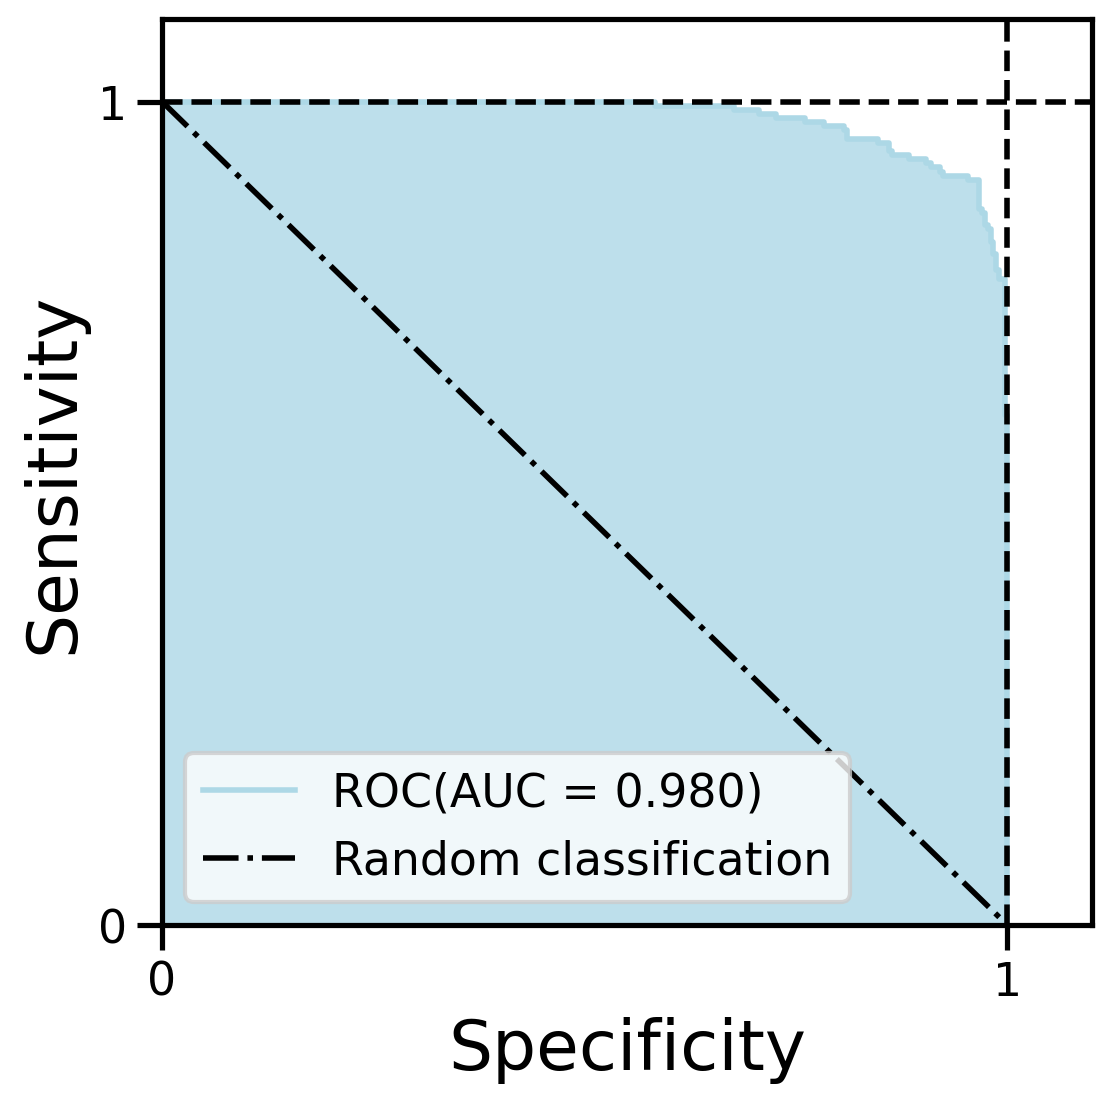

In [8]:
fpr,tpr,_ = roc_curve(true,probs)
roc_auc = auc(fpr,tpr)
lw = 2
tnr = 1-fpr#
fig = plt.figure(figsize=(6,6),dpi=200)

ax = plt.plot(tnr, tpr, color='lightblue',
         lw=lw, label='ROC(AUC = %0.3f)' % roc_auc)
plt.plot( [0, 1],[1, 0], color='black', lw=lw, linestyle='dashdot',label='Random classification')
plt.plot( [0, 1.1],[1, 1], color='black', lw=lw, linestyle='--')
plt.plot( [1, 1],[0, 1.1], color='black', lw=lw, linestyle='--')#


plt.fill_between(tnr,0,tpr,facecolor='lightblue',alpha=0.8)
plt.xlim(0,1.1)
plt.ylim(0,1.1)
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Specificity',fontsize=25)
plt.ylabel('Sensitivity',fontsize=25)
plt.legend()
plt.show()